In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Get the Dataset

In [3]:
data = pd.read_csv('Amazon Book Reviews.csv')
data.tail()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
7431,A27D52RUOADQVR,60582006,Mikew,"[0,0]",Love getting to know each of their lives. She ...,5,Heartwarming,1362268800,"03 3, 2013"
7432,A93B8XMH93D1R,60582006,"miss demeaner ""BOOK SMARTS""","[5,13]","UNLIKE SOME OF REVIEWERS ON HERE, I WON'T END ...",2,A LONG YARN,1149811200,"06 9, 2006"
7433,A2JEMVYOM5IFU0,60582006,Norah E. Sempelsz,"[0,0]","I could not put this book down, I was so mired...",5,Warm and Inviting Yarn Shop,1203811200,"02 24, 2008"
7434,AX64AMAD1RTMI,60582006,Robin Wren,"[0,0]","I have read Debbie Macomber's ""The Shop on Blo...",4,Just a warm and touching Story,1186444800,"08 7, 2007"
7435,A1Y0Y74B0POAA6,60582006,Sharon Galligar Chance,"[54,57]",There's something so soothing about knitting -...,5,A treasure! Very heartwarming!,1114732800,"04 29, 2005"


In [4]:
# book_names = pd.read_csv('book_data.csv')
# #book_names = book_names[[0,2]]
# #book_names.columns = ['asin','title']
# book_names.head()

In [5]:
# df = pd.merge(data, book_names, on = "asin")
# df.head()

In [6]:
data.groupby('asin').count()

,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
asin,,,,,,,,
006055584X,29,29,29,29,29,29,29,29
006055665X,26,26,26,26,26,26,26,26
006055973X,11,11,11,11,11,11,11,11
006056038X,28,28,28,28,28,28,28,28
006056167X,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...
60581174,11,11,11,11,11,11,11,11
60581778,52,52,52,52,52,52,52,52
60581840,22,22,22,22,22,22,22,22


In [7]:
 data.groupby('asin').count()['overall'].sort_values(ascending=False)

asin
60558121      675
60573775      436
60572965      307
60575913      278
006056251X    193
             ... 
60560894       10
60555653       10
60563729       10
60576456       10
60575271       10
Name: overall, Length: 170, dtype: int64

In [8]:
overall = pd.DataFrame(data.groupby('asin').mean()['overall'])
overall.head()

,overall
asin,
006055584X,3.965517
006055665X,4.346154
006055973X,4.454545
006056038X,3.464286
006056167X,4.250000


In [9]:
overall['num of ratings'] = pd.DataFrame( data.groupby('asin').count()['overall'])
overall.head()

,overall,num of ratings
asin,,
006055584X,3.965517,29
006055665X,4.346154,26
006055973X,4.454545,11
006056038X,3.464286,28
006056167X,4.250000,12


In [10]:
overall.sort_values(by='overall',ascending=False)

,overall,num of ratings
asin,,
60580860,4.941176,17
60560894,4.900000,10
60555599,4.833333,12
60567643,4.828571,35
60573821,4.818182,11
...,...,...
60560754,3.272727,11
60562560,3.173913,23
60560789,3.161290,31


In [11]:
#Discard entries with less number of ratings

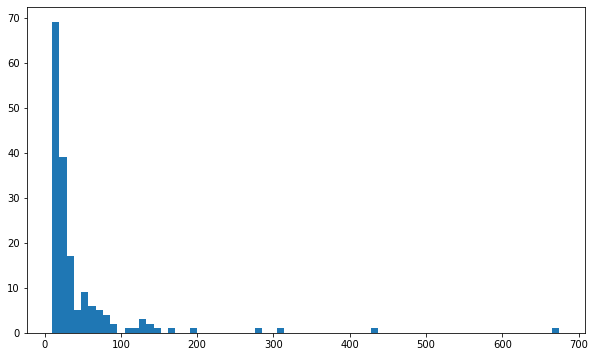

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(overall['num of ratings'], bins=70)
plt.show()

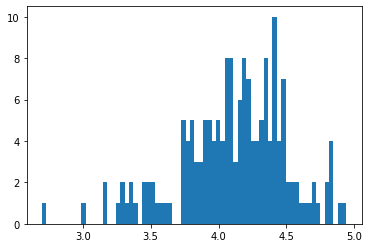

In [13]:
plt.hist(overall['overall'], bins=70)
plt.show()

In [14]:
bookmat = data.pivot_table(index="reviewerID", columns="asin", values="overall").fillna(0)
bookmat.tail()

asin,006055584X,006055665X,006055973X,006056038X,006056167X,006056198X,006056251X,006056346X,006056458X,006056539X,...,60580542,60580674,60580860,60580976,60581069,60581174,60581778,60581840,60581859,60582006
reviewerID,,,,,,,,,,,,,,,,,,,,,
AZW2TLAQZEYDF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZWW1U604W0N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
AZYIHKBD3FZBI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZ4GD20C58ND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZHHNN8RQ7YQ,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
overall.sort_values('num of ratings', ascending=False).head()

,overall,num of ratings
asin,,
60558121,4.025185,675
60573775,4.222477,436
60572965,4.032573,307
60575913,4.348921,278
006056251X,4.476684,193


In [16]:
def predict_books(book_name):
    book_user_ratings = bookmat[book_name]
    similar_to_book = bookmat.corrwith(book_user_ratings)
    corr_book = pd.DataFrame(similar_to_book, columns=['Correlation'])
    corr_book.dropna(inplace=True)
    corr_book = corr_book.join(overall['num of ratings'])
    predictions = corr_book[corr_book['num of ratings']>100].sort_values('Correlation',ascending = False)
    return predictions

In [17]:
predictions = predict_books("60572965")
predictions.head()

,Correlation,num of ratings
asin,,
60572965,1.000000,307
60572973,0.452506,164
006057299X,0.328458,135
60562536,-0.004056,120
60562498,-0.005295,128


### KNN

In [18]:
# import gzip
# import simplejson

# def parse(filename):
#     f = gzip.open(filename, 'r')
#     entry = {}
#     for l in f:
#         l = l.strip()
#         colonPos = l.find(':')
#         if colonPos == -1:
#             yield entry
#             entry = {}
#             continue
#         eName = l[:colonPos]
#         rest = l[colonPos+2:]
#         entry[eName] = rest
#     yield entry

# for e in parse("Books.txt.gz"):
#     print(simplejson.dumps(e))

# import json 

# filename = 'tempFile.txt'

  
# # creating dictionary 
# def parse(filename):
#     with open(filename) as fh: 
#         dict1 = {}
#         for l in fh: 
#             l = l.strip()
#             colonPos = l.find(':')
#             if colonPos == -1:
#                 yield dict1
#                 dict1 = {}
#                 continue
            
#             eName = l[:colonPos]
#             rest = l[colonPos+2:]
#             dict1[eName] = rest
#     yield dict1
  
# for e in parse(filename):
#     out_file = open("test1.json", "w") 
#     json.dump(dict1, out_file, indent = 4, sort_keys = False) 
#     out_file.close() 

In [19]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

bookmatcsr = csr_matrix(bookmat.values)

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(bookmatcsr)

NearestNeighbors(algorithm='brute', metric='cosine')

In [20]:
from fuzzywuzzy import process
def recommender(book_name, d,model, n_recommendations ):
    model.fit(d)
    idx=process.extractOne(book_name, data['asin'])[2]
    print('Book Selected: ',data['asin'][idx], 'Index: ',idx)
    print('Searching for recommendations.....')
    distances, indices=model.kneighbors(d[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(data['asin'][i].where(i!=idx))
    
recommender('60572965', bookmatcsr, model_knn,6)

Book Selected:  60572965 Index:  4660
Searching for recommendations.....
3356    006056542X
4282      60568984
1973      60561785
2221      60562498
4660           NaN
2599      60562560
Name: asin, dtype: object


In [21]:
# def make_recommendation(input_str,d,model,mapper,n_recommendation):
#     print("system is working....\n")
#     model.fit(d)
    
#     index = fuzzy_movie_name_matching (input_str,mapper,print_matches = False)
    
#     if index==-1 :
#         print("pls enter a valid movie name\n")
#         return 
    
#     index_list = model.kneighbors(d[index],n_neighbors=n_recommendation+1,return_distance=False)
#     index_to_movie={
#         ind:movie for movie,ind in mapper.items()
#     }
    
#     print("Viewer who watches this movie ",input_str,"also watches following movies.")
#     #print(index_list[0][2])
#     for i in range(1,index_list.shape[1]):
#         print(index_to_movie[index_list[0][i]])
    
    
    
#     return

# make_recommendation('60572965',bookmatcsr,recommendation_model,movie_to_index,10)